Matplotlib is building the font cache; this may take a moment.
/opt/miniconda3/envs/venv1/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21312 (\N{CJK UNIFIED IDEOGRAPH-5340}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/venv1/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22495 (\N{CJK UNIFIED IDEOGRAPH-57DF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/venv1/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/venv1/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/venv1/lib/python3.10/site-pa

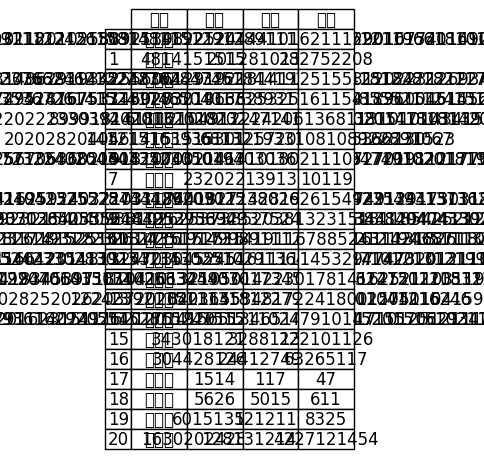

/opt/miniconda3/envs/venv1/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31449 (\N{CJK UNIFIED IDEOGRAPH-7AD9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/venv1/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21517 (\N{CJK UNIFIED IDEOGRAPH-540D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/venv1/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/venv1/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22336 (\N{CJK UNIFIED IDEOGRAPH-5740}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/venv1/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19979

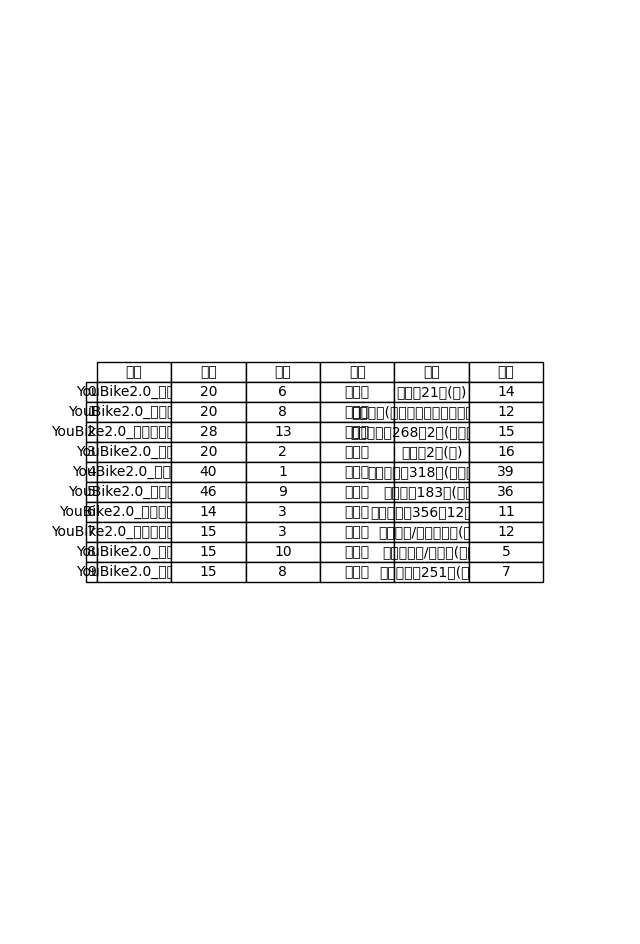

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Fetch data
url = 'https://data.ntpc.gov.tw/api/datasets/010E5B15-3823-4B20-B401-B1CF000550C5/json?page=0&size=2000'
response = requests.get(url)
data = response.json()

# Create dataframe with relevant columns
df = pd.DataFrame(data, columns=['sna', 'tot', 'sbi', 'sarea', 'ar', 'bemp'])

# Rename columns to match the desired table format
df = df.rename(columns={'sna': '站名', 'sarea': '區域', 'ar': '地址', 'tot': '數量', 'sbi': '可借', 'bemp': '可還'})

# Create summary table grouped by region
summary_df = df.groupby('區域').agg({'數量': 'sum', '可還': 'sum', '可借': 'sum'}).reset_index()

# Display the summary table using matplotlib
fig, ax = plt.subplots(figsize=(6, 4))  # Adjust the size of the image
ax.axis('tight')
ax.axis('off')
tbl = table(ax, summary_df, loc='center', cellLoc='center', colWidths=[0.1]*len(summary_df.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.2)
plt.show()

# To create the second detailed table (station list)
fig2, ax2 = plt.subplots(figsize=(8, 12))  # Adjust the size of the image
ax2.axis('tight')
ax2.axis('off')
tbl2 = table(ax2, df.head(10), loc='center', cellLoc='center', colWidths=[0.1]*len(df.columns))  # Only display the first 10 rows for simplicity
tbl2.auto_set_font_size(False)
tbl2.set_fontsize(10)
tbl2.scale(1.2, 1.2)
plt.show()


In [2]:
#16 使用Groupby() 
import requests
from requests import ConnectionError,HTTPError,Timeout
url = 'https://data.ntpc.gov.tw/api/datasets/010E5B15-3823-4B20-B401-B1CF000550C5/json?page=0&size=2000'
try:
    response = requests.get(url)    
    response.raise_for_status()    
except ConnectionError:
    print('找不到伺服器')
except HTTPError:
    print('網頁找不到')
except Timeout:
    print('超過時間沒有回應')
else:
    print('沒有發生問題')

import pandas as pd
df1 = pd.DataFrame(response.json(),
                   columns=['sna','tot','sbi','sarea','ar','bemp'])

df2 = df1.rename(columns={'sna':'站名', 'sarea':'區域', 'ar':'地址', 'tot':'數量','sbi':'可借', 'bemp':'可還'})

#小心資料類型
print(df2.info())

df2[['數量', '可還', '可借']] = df2[['數量', '可還', '可借']].astype(int) # 將'數量', '可還', '可借'欄位字串資料轉換為整數
df3 = df2[['區域', '數量', '可還', '可借']]
groupby = df3.groupby(by='區域')[['數量', '可還', '可借']]
groupby.sum()

沒有發生問題
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   站名      1000 non-null   object
 1   數量      1000 non-null   object
 2   可借      1000 non-null   object
 3   區域      1000 non-null   object
 4   地址      1000 non-null   object
 5   可還      1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB
None


,數量,可還,可借
區域,,,
三峽區,1482,908,568
三芝區,153,81,72
三重區,3592,2545,964
中和區,3381,2135,1163
五股區,566,337,218
八里區,443,305,134
土城區,2737,1988,611
坪林區,65,35,30
新店區,2031,1304,646


In [3]:
import requests
from requests import ConnectionError,HTTPError,Timeout
url = 'https://data.ntpc.gov.tw/api/datasets/010E5B15-3823-4B20-B401-B1CF000550C5/json?page=0&size=2000'
try:
    response = requests.get(url)    
    response.raise_for_status()    
except ConnectionError:
    print('找不到伺服器')
except HTTPError:
    print('網頁找不到')
except Timeout:
    print('超過時間沒有回應')
else:
    print('沒有發生問題')

import pandas as pd
df1 = pd.DataFrame(response.json(),
                   columns=['sna','tot','sbi','sarea','ar','bemp'])

df2 = df1.rename(columns={'sna':'站名', 'sarea':'區域', 'ar':'地址', 'tot':'數量','sbi':'可借', 'bemp':'可還'})

#小心資料類型
df2.info()

df2[['數量', '可還', '可借']] = df2[['數量', '可還', '可借']].astype(int) # 將'數量', '可還', '可借'欄位字串資料轉換為整數
df3 = df2[['區域', '數量', '可還', '可借']]
groupby = df3.groupby(by='區域')[['數量', '可還', '可借']]
groupby.sum()

沒有發生問題
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   站名      1000 non-null   object
 1   數量      1000 non-null   object
 2   可借      1000 non-null   object
 3   區域      1000 non-null   object
 4   地址      1000 non-null   object
 5   可還      1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


,數量,可還,可借
區域,,,
三峽區,1482,856,621
三芝區,153,79,74
三重區,3592,2515,999
中和區,3381,2153,1149
五股區,566,349,206
八里區,443,311,128
土城區,2737,1996,604
坪林區,65,35,30
新店區,2031,1279,674
